|  |  | 
|----------|----------|
| Name: | Elad Siman Tov | 
|  Course:   | ME 036049   |
|  Homerwork:   | No. 4   |


### Computation

<!-- ![](q1.jpeg) -->

#### Part a
Here I will use the 1D Unsteady Diffusion PINNs model for different diffusion coefficients and compare the final results. I will import a file called *PINN_Classes* where I stored the definitions of the different models.

In [1]:
import torch
import torch.nn as nn
from torch.autograd import grad
import torch.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PINN_Classes import Diffusion_PINNs_1D

##### Setting up the use cases

In [2]:
# num of points in the domain
Nx, Nt = 128, 128

# define domain dimensions and resolution
Lx_initial, Lx_final = 0, 1
t_initial, t_final = 0, 1
dx = (Lx_final - Lx_initial) / (Nx - 1)
dt = (t_final - t_initial) / (Nt-1)

# initiallize input parameters as tensors
x = torch.zeros(Nx, Nt)
t = torch.zeros(Nx, Nt)
for i in range(Nx):
    for j in range(Nt):
        x[i,j] = Lx_initial + dx * i
        t[i,j] = t_initial + dt * j


##### Using different models

epoch: 0, loss: 10.401286125183105
epoch: 100, loss: 7.121054172515869
epoch: 200, loss: 0.813080906867981
epoch: 300, loss: 0.3333478569984436
epoch: 400, loss: 0.18561522662639618
epoch: 500, loss: 0.15994709730148315
epoch: 600, loss: 0.065738245844841
epoch: 700, loss: 0.04871957749128342
epoch: 800, loss: 0.031818438321352005
epoch: 900, loss: 0.025787554681301117


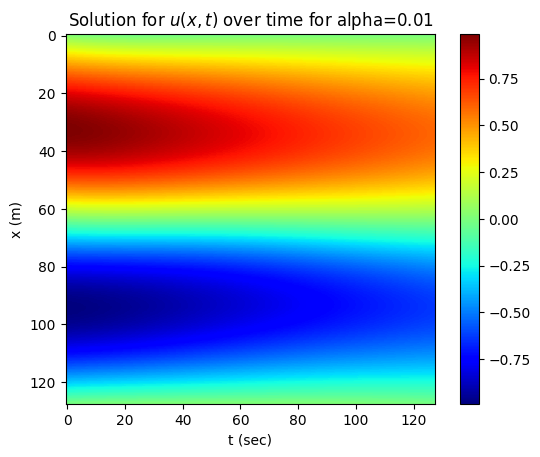

epoch: 0, loss: 9.952513694763184
epoch: 100, loss: 6.559505462646484
epoch: 200, loss: 0.9957858324050903
epoch: 300, loss: 0.09850098192691803
epoch: 400, loss: 0.053147584199905396
epoch: 500, loss: 0.028757719323039055
epoch: 600, loss: 0.020579200237989426
epoch: 700, loss: 0.015858598053455353
epoch: 800, loss: 0.01419171504676342
epoch: 900, loss: 0.04586707055568695


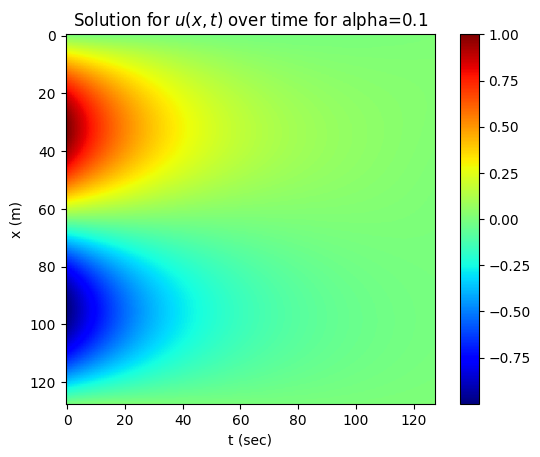

epoch: 0, loss: 11.563432693481445
epoch: 100, loss: 7.794733047485352
epoch: 200, loss: 2.0839743614196777
epoch: 300, loss: 0.2649880051612854
epoch: 400, loss: 0.1120111271739006
epoch: 500, loss: 0.045536402612924576
epoch: 600, loss: 0.034432489424943924
epoch: 700, loss: 0.017876993864774704
epoch: 800, loss: 0.013787725009024143
epoch: 900, loss: 0.13721388578414917


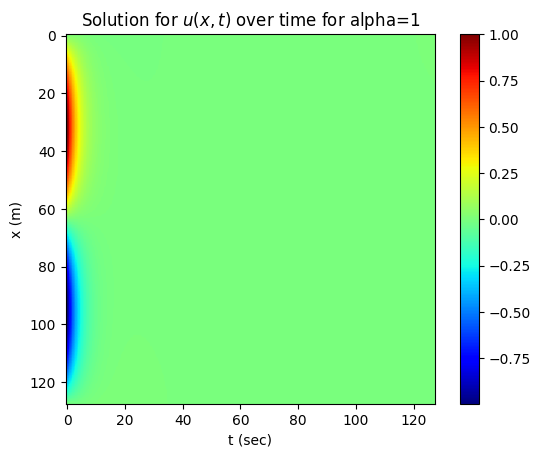

In [3]:
diffusion_coefficient_cases = [0.01, 0.1, 1]
for alpha in diffusion_coefficient_cases:
    model = Diffusion_PINNs_1D(use_ffm=False, diff_coeff=alpha)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(1000):
    # compute various losses
        eq_loss, BC_loss, IC_loss = model.compute_loss(x.view(-1,1), t.view(-1,1), Nx, Nt)

        # compute total loss
        total_loss = eq_loss + 20*BC_loss + 20*IC_loss

        # backward pass
        total_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # skip by 100 epochs before printing
        if not epoch%100:
            print(f"epoch: {epoch}, loss: {total_loss}")

    u = model.forward(x.view(-1,1), t.view(-1,1)) # convert x tensor into a column vector
    u_np = u.detach().numpy() # convert into a np array
    u_reshaped = u_np.reshape(Nx,Nt)

    plt.imshow(u_reshaped[:,:], cmap='jet')
    plt.title(f"Solution for $u(x,t)$ over time for alpha={alpha}")
    plt.colorbar()
    plt.xlabel("t (sec)")
    plt.ylabel("x (m)")
    plt.show()

#### Part b - Allen Cahn

In [4]:
from PINN_Classes import Allen_Cahn_1D_PINNs

##### Setting up the use cases

In [5]:
# num of points in the domain
Nx, Nt = 128, 128

# define domain dimensions and resolution
Lx_initial, Lx_final = -1, 1
t_initial, t_final = 0, 1
dx = (Lx_final - Lx_initial) / (Nx - 1)
dt = (t_final - t_initial) / (Nt-1)

# initiallize input parameters as tensors
x = torch.zeros(Nx, Nt)
t = torch.zeros(Nx, Nt)
for i in range(Nx):
    for j in range(Nt):
        x[i,j] = Lx_initial + dx * i
        t[i,j] = t_initial + dt * j


epoch: 0, loss: 3.6087818145751953
epoch: 500, loss: 1.0110085010528564
epoch: 1000, loss: 1.0136874914169312
epoch: 1500, loss: 0.9320902228355408


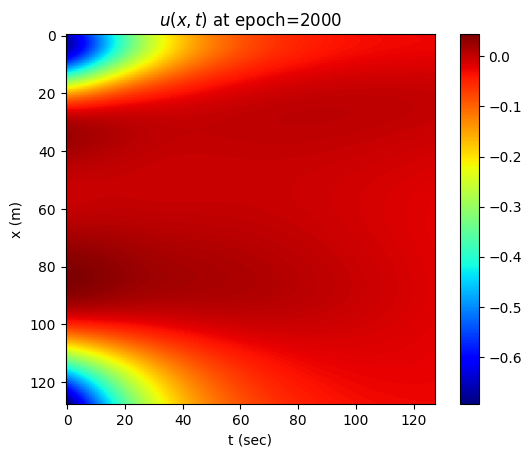

epoch: 2000, loss: 0.9170194268226624
epoch: 2500, loss: 0.909360945224762
epoch: 3000, loss: 0.9045158624649048
epoch: 3500, loss: 0.900154173374176
epoch: 4000, loss: 0.8981761336326599
epoch: 4500, loss: 0.8964554667472839


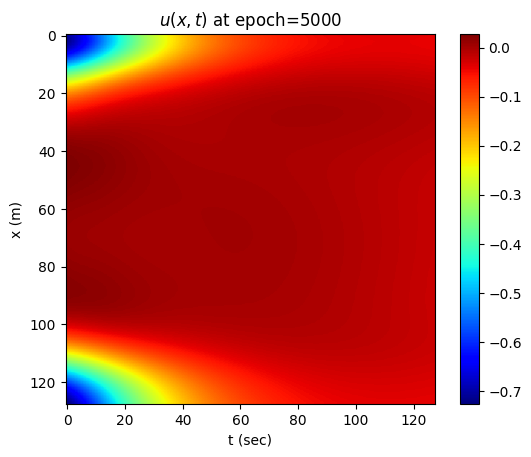

epoch: 5000, loss: 0.8942526578903198
epoch: 5500, loss: 0.893661379814148
epoch: 6000, loss: 0.8957456350326538
epoch: 6500, loss: 0.8938789367675781
epoch: 7000, loss: 0.8908458948135376
epoch: 7500, loss: 0.8863319754600525
epoch: 8000, loss: 0.9134286642074585
epoch: 8500, loss: 0.8846665024757385
epoch: 9000, loss: 0.882631778717041
epoch: 9500, loss: 0.8815603852272034
epoch: 10000, loss: 0.8795162439346313
epoch: 10500, loss: 0.8761231899261475
epoch: 11000, loss: 0.8998742699623108
epoch: 11500, loss: 0.8882033824920654
epoch: 12000, loss: 0.8873723149299622
epoch: 12500, loss: 0.8871829509735107
epoch: 13000, loss: 0.885071337223053
epoch: 13500, loss: 0.8840809464454651
epoch: 14000, loss: 0.8830869197845459
epoch: 14500, loss: 0.8822808861732483


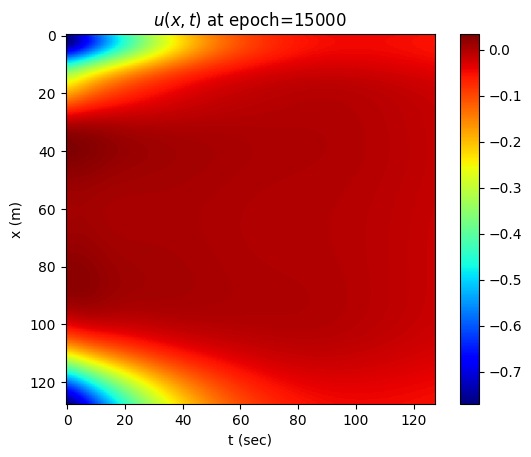

epoch: 15000, loss: 0.8809372782707214
epoch: 15500, loss: 0.8792852759361267
epoch: 16000, loss: 0.8766546845436096
epoch: 16500, loss: 0.8734652996063232
epoch: 17000, loss: 0.8757535219192505
epoch: 17500, loss: 0.5533410906791687
epoch: 18000, loss: 0.0392947793006897
epoch: 18500, loss: 0.020056897774338722
epoch: 19000, loss: 0.01487440150231123
epoch: 19500, loss: 0.012701889500021935


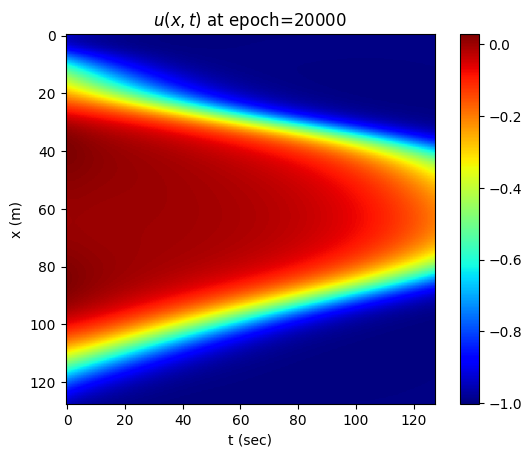

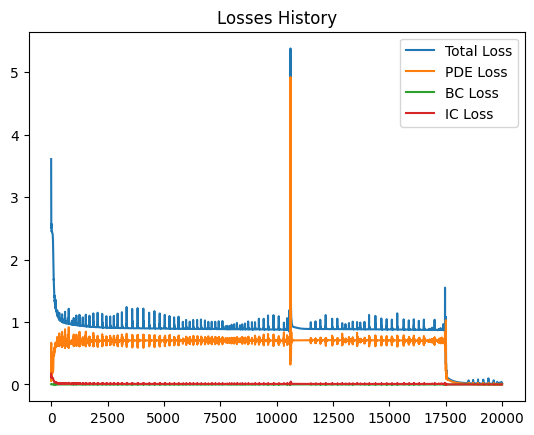

In [6]:
model = Allen_Cahn_1D_PINNs()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_of_epochs = 20000
losses_history = np.zeros((num_of_epochs, 4))

for epoch in range(num_of_epochs):
# compute various losses
    eq_loss, BC_loss, IC_loss = model.compute_loss(x.view(-1,1), t.view(-1,1), Nx, Nt)

    # compute total loss
    total_loss = eq_loss + 20*BC_loss + 20*IC_loss

    # save date for losses history
    losses_history[epoch, 0] = total_loss
    losses_history[epoch, 1] = eq_loss
    losses_history[epoch, 2] = BC_loss
    losses_history[epoch, 3] = IC_loss

    # backward pass
    total_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # skip by 500 epochs before every print
    if not epoch%500:
        print(f"epoch: {epoch}, loss: {total_loss}")
    
    # plot solutions by the end of [5000, 15000, 20000] epochs
    if epoch+1 in [2000, 5000, 15000, 20000]:
        u = model.forward(x.view(-1,1), t.view(-1,1)) # convert x tensor into a column vector
        u_np = u.detach().numpy() # convert into a np array
        u_reshaped = u_np.reshape(Nx,Nt)
        plt.imshow(u_reshaped[:,:], cmap='jet')
        plt.colorbar()
        plt.title(f"$u(x,t)$ at epoch={epoch+1}")
        plt.xlabel("t (sec)")
        plt.ylabel("x (m)")
        plt.show()


plt.plot(losses_history)
plt.title("Losses History")
plt.legend(["Total Loss", "PDE Loss", "BC Loss", "IC Loss"])


#### Part d - Studying the effect of FFMs

epoch: 0, loss: 2.7488596439361572
epoch: 500, loss: 0.8861088156700134
epoch: 1000, loss: 0.05930585414171219
epoch: 1500, loss: 0.03926784545183182
epoch: 2000, loss: 0.0315205380320549
epoch: 2500, loss: 0.02909487672150135
epoch: 3000, loss: 0.025914005935192108
epoch: 3500, loss: 0.024264851585030556
epoch: 4000, loss: 0.022779766470193863
epoch: 4500, loss: 0.021603386849164963


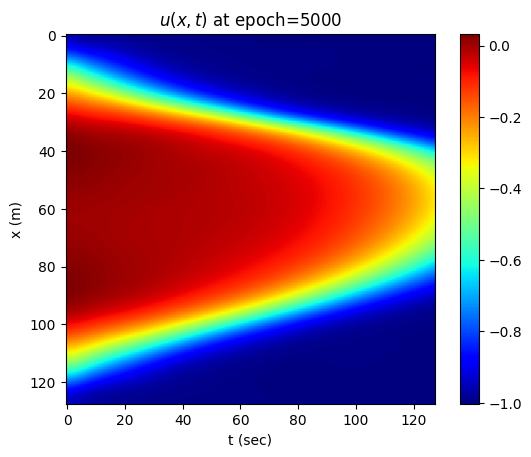

epoch: 5000, loss: 0.020247869193553925
epoch: 5500, loss: 0.019191797822713852
epoch: 6000, loss: 0.01826496608555317
epoch: 6500, loss: 0.0171140618622303
epoch: 7000, loss: 0.016082696616649628
epoch: 7500, loss: 0.015298517420887947
epoch: 8000, loss: 0.014574057422578335
epoch: 8500, loss: 0.014003068208694458
epoch: 9000, loss: 0.013511590659618378
epoch: 9500, loss: 0.013404212892055511
epoch: 10000, loss: 0.012786949053406715
epoch: 10500, loss: 0.01640583574771881
epoch: 11000, loss: 0.01233481615781784
epoch: 11500, loss: 0.01222139596939087
epoch: 12000, loss: 0.012052040547132492
epoch: 12500, loss: 0.012751941569149494
epoch: 13000, loss: 0.012318241409957409
epoch: 13500, loss: 0.011703806929290295
epoch: 14000, loss: 0.011653617024421692
epoch: 14500, loss: 0.012179439887404442


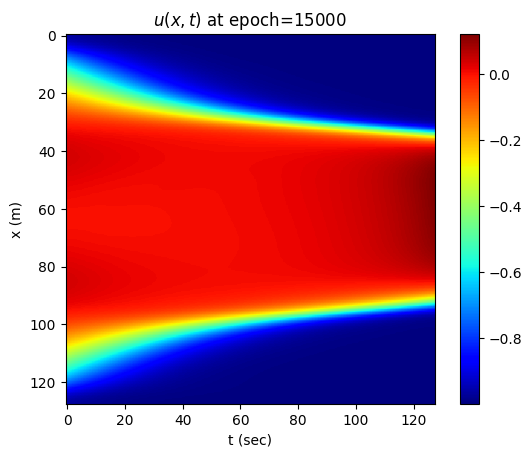

epoch: 15000, loss: 0.011493622325360775
epoch: 15500, loss: 0.011355290189385414
epoch: 16000, loss: 0.01130964420735836
epoch: 16500, loss: 0.011408453807234764
epoch: 17000, loss: 0.011155577376484871
epoch: 17500, loss: 0.011100772768259048
epoch: 18000, loss: 0.011020392179489136
epoch: 18500, loss: 0.011275367811322212
epoch: 19000, loss: 0.010847387835383415
epoch: 19500, loss: 0.01059894822537899


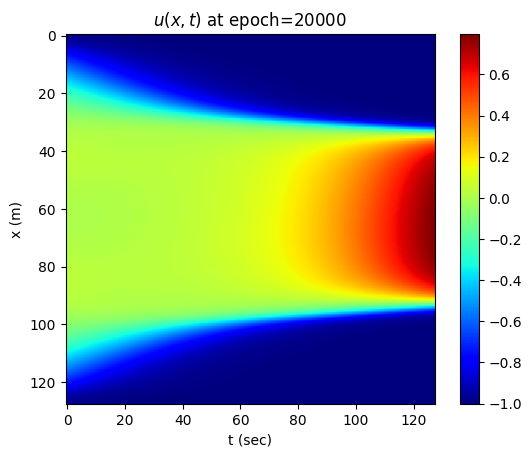

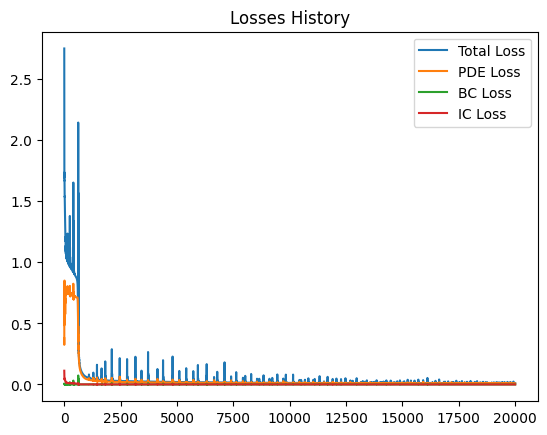

In [7]:
model = Allen_Cahn_1D_PINNs(use_ffm=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_of_epochs = 20000
losses_history = np.zeros((num_of_epochs, 4))

for epoch in range(num_of_epochs):
# compute various losses
    eq_loss, BC_loss, IC_loss = model.compute_loss(x.view(-1,1), t.view(-1,1), Nx, Nt)

    # compute total loss
    total_loss = eq_loss + 20*BC_loss + 20*IC_loss

    # save date for losses history
    losses_history[epoch, 0] = total_loss
    losses_history[epoch, 1] = eq_loss
    losses_history[epoch, 2] = BC_loss
    losses_history[epoch, 3] = IC_loss

    # backward pass
    total_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # skip by 500 epochs before every print
    if not epoch%500:
        print(f"epoch: {epoch}, loss: {total_loss}")
    
    # plot solutions by the end of [5000, 15000, 20000] epochs
    if epoch+1 in [5000, 15000, 20000]:
        u = model.forward(x.view(-1,1), t.view(-1,1)) # convert x tensor into a column vector
        u_np = u.detach().numpy() # convert into a np array
        u_reshaped = u_np.reshape(Nx,Nt)
        plt.imshow(u_reshaped[:,:], cmap='jet')
        plt.title(f"$u(x,t)$ at epoch={epoch+1}")
        plt.colorbar()
        plt.xlabel("t (sec)")
        plt.ylabel("x (m)")
        plt.show()


plt.plot(losses_history)
plt.title("Losses History")
plt.legend(["Total Loss", "PDE Loss", "BC Loss", "IC Loss"])